Riddler Classic

From Dave Moran, a tricky take on a classic cash money problem:

You’re on a game show, and you’re asked to sit down at a table covered with sealed envelopes. You are told that each envelope contains a check for an amount of money, each amount different from all the others, but you are given no other information about the distribution of amounts. (As far as you know, the biggest check on the table could be $$1.06$ or it could be $98,765,432,100.00$.) You may pick an envelope, open it and read the amount of the check. You can then either keep that check, ending the game, or toss it away permanently and open another envelope. You can then keep that second check or toss it away and open a third envelope. And then you can keep the third check or throw it away and pick a fourth envelope. But that’s it — if you open a fourth envelope, you have to keep that check, no matter how paltry it is.

What strategy should you follow to maximize your chances of getting a nice payday?

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
sns.set_style('white')
%matplotlib inline

# setting up
We have 4 envelops, and we don't know what are in those envelopes. What we know is #4 envelope have larger reward than #3, and so on

# demonstrate shuffle the order of the envelopes

In [5]:
envelopes = [1,2,3,4]
for ii in range(10):
    random.shuffle(envelopes)
    print(envelopes)

[1, 4, 2, 3]
[1, 4, 3, 2]
[3, 4, 2, 1]
[1, 3, 2, 4]
[3, 1, 2, 4]
[2, 1, 3, 4]
[3, 4, 1, 2]
[3, 4, 1, 2]
[1, 4, 3, 2]
[4, 3, 1, 2]


# Without any strategy, we just blindly pick at all orders, and see what we get. We expect a flat distribution of the reward

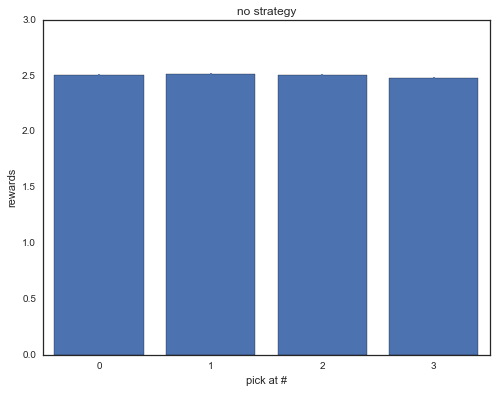

In [120]:
n = 100
results = []
for ii in range(n):
    rewards = np.zeros((n,4))
    for sim in range(n):
        envelopes = [1,2,3,4]
        # so we don't know positions of the envelops
        for ii in range(100):
            random.shuffle(envelopes) 
        working_envelopes = envelopes
        temp = np.random.choice(working_envelopes,size=1,
                               replace=False)[0]
        rewards[sim,0]=temp
        working_envelopes.remove(temp)
        temp = np.random.choice(working_envelopes,size=1,
                               replace=False)[0]
        rewards[sim,1]=temp
        working_envelopes.remove(temp)
        temp = np.random.choice(working_envelopes,size=1,
                               replace=False)[0]
        rewards[sim,2]=temp
        working_envelopes.remove(temp)
        rewards[sim,3]=working_envelopes[0]
    results.append(np.mean(rewards,0))
fig,ax = plt.subplots(figsize=(8,6))
_=ax.bar(np.arange(4),
         np.mean(results,0),align='center')
_=ax.errorbar(np.arange(4),np.mean(results,0),
             np.std(results,0)/np.sqrt(n),
              fmt='None')
_=ax.set(xticks=np.arange(4),title='no strategy',
        xlabel='pick at #',ylabel='rewards')

# We can use the non-strategic results as a baseline. My strategy would be pick at least twice, and if the second pick is larger than the first time, we stop. Else, we continue until the next pick is larger than the last pick. 

In [49]:
def at_least_pick_twice(envelopes):
    working_envelopes = envelopes
    pick = np.zeros(4)
    pick[0] = np.random.choice(working_envelopes,
                                     size=1,replace=False)[0]
    ##print('first pick:',pick[0])
    #if pick[0] == 4:
    #    return pick
    
    working_envelopes.remove(pick[0])
    ##print("what's left: ",working_envelopes)
    pick[1] = np.random.choice(working_envelopes,
                                      size=1,replace=False)[0]
    ##print('second pick: ',pick[1])
    if (pick[1] < pick[0]):
        working_envelopes.remove(pick[1])
        ##print("what's left ",working_envelopes)
        pick[2] = np.random.choice(working_envelopes,
                                         size=1,replace=False)[0]
        ##print('third pick: ',pick[2])
        if (pick[2] < pick[1]):
            working_envelopes.remove(pick[2])
            ##print("what's left: ",working_envelopes)
            pick[3] = working_envelopes[0]
    return pick

In [87]:
gameTime = 10
simTime = 500
gameResults = []
for game in range(gameTime):
    simResults = []
    for sim in range(simTime):
        envelopes = [1,2,3,4]
        # so we don't know positions of the envelops
        for ii in range(100):
            random.shuffle(envelopes) 
        pick_result = at_least_pick_twice(envelopes)
        reward = pick_result[np.nonzero(pick_result)][-1]
        ##print(pick_result,reward)
        simResults.append([reward,len(np.nonzero(pick_result)[0]),game])
    gameResults.append(simResults)

gameResults = np.concatenate(gameResults)
gameResults = pd.DataFrame(gameResults,
                           columns=['reward','pick','game'])

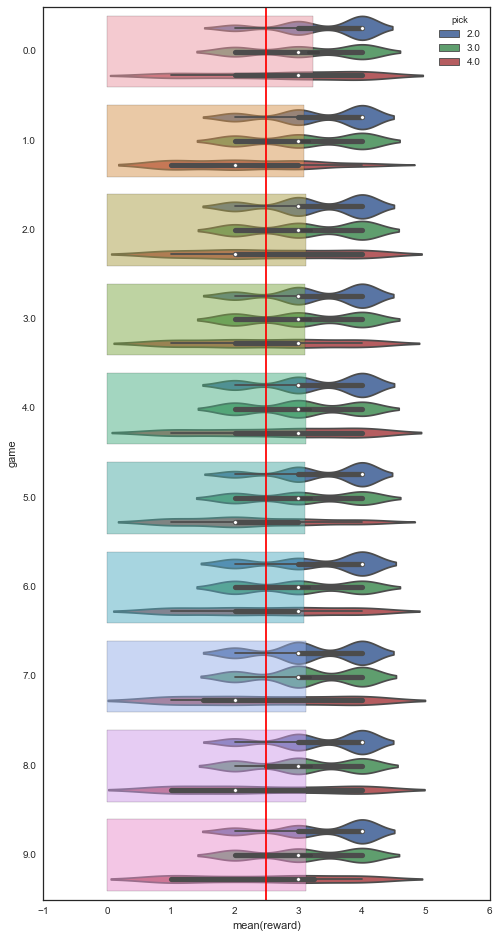

In [119]:
fig,ax = plt.subplots(figsize=(8,16))
sns.violinplot(y='game',x='reward',hue='pick',
           data=gameResults,inner='box',
              orient='h',ax=ax)
sns.barplot(y='game',x='reward',data=gameResults,
            orient='h',ax=ax,alpha=0.5)
ax.axvline(2.5,color='red')

We improve the reward by around 0.5 magnitude. 

# What about we have a ideal amount of reward, and if we hit it, and we stop. In this case, we consider '4' is the ideal amount. 

In [150]:
def at_least_pick_twice_unless_we_got_the_largest(envelopes):
    working_envelopes = envelopes
    pick = np.zeros(4)
    pick[0] = np.random.choice(working_envelopes,
                                     size=1,replace=False)[0]
    ##print('first pick:',pick[0])
    if pick[0] == 4:
        return pick
    else:
        working_envelopes.remove(pick[0])
        ##print("what's left: ",working_envelopes)
        pick[1] = np.random.choice(working_envelopes,
                                          size=1,replace=False)[0]
        ##print('second pick: ',pick[1])
        if pick[1] ==4 :
            return pick
        elif (pick[1] < pick[0]):
            working_envelopes.remove(pick[1])
            ##print("what's left ",working_envelopes)
            pick[2] = np.random.choice(working_envelopes,
                                             size=1,replace=False)[0]
            ##print('third pick: ',pick[2])
            if (pick[2] < pick[1]):
                working_envelopes.remove(pick[2])
                ##print("what's left: ",working_envelopes)
                pick[3] = working_envelopes[0]
        return pick

In [151]:
gameTime = 10
simTime = 500
gameResults = []
for game in range(gameTime):
    simResults = []
    for sim in range(simTime):
        envelopes = [1,2,3,4]
        # so we don't know positions of the envelops
        for ii in range(100):
            random.shuffle(envelopes) 
        pick_result = at_least_pick_twice_unless_we_got_the_largest(envelopes)
        reward = pick_result[np.nonzero(pick_result)][-1]
        ##print(pick_result,reward)
        simResults.append([reward,len(np.nonzero(pick_result)[0]),game])
    gameResults.append(simResults)

gameResults = np.concatenate(gameResults)
gameResults = pd.DataFrame(gameResults,
                           columns=['reward','pick','game'])

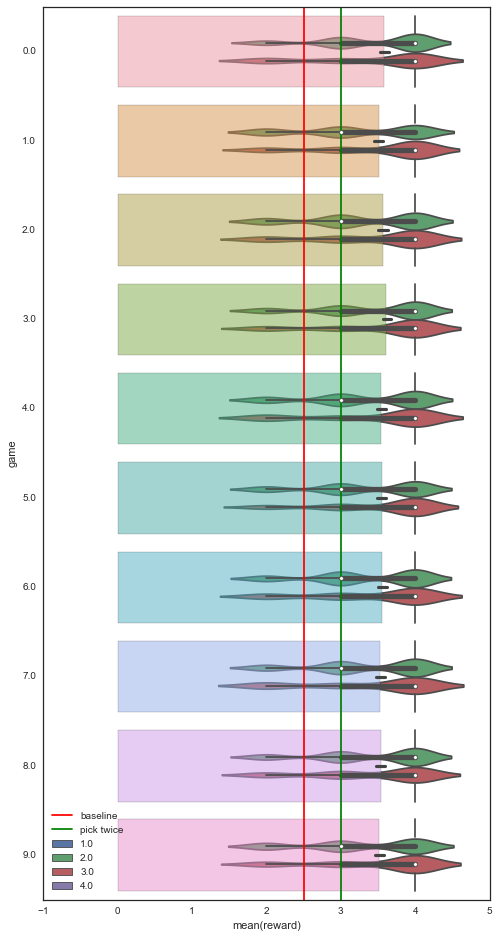

In [152]:
fig,ax = plt.subplots(figsize=(8,16))
sns.violinplot(y='game',x='reward',hue='pick',
           data=gameResults,inner='box',
              orient='h',ax=ax)
sns.barplot(y='game',x='reward',data=gameResults,
            orient='h',ax=ax,alpha=0.5)
ax.axvline(2.5,color='red',label='baseline')
ax.axvline(3,color='green',label='pick twice')
ax.legend(loc='best')

We improve the reward for another 0.5 magnitude